# Template Matching using OpenCV

In [1]:
# Import necessary libraries 
import cv2  # OpenCV 
import numpy as np # Linear Regression
import matplotlib.pyplot as plt # Visualization library
%matplotlib inline

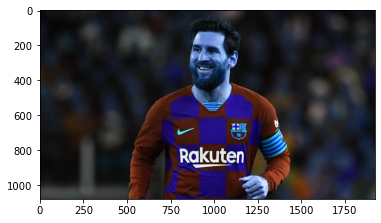

In [18]:
# First we will read the image
# we need to convert it's color from BGR into RGB to see it clearly
full = cv2.imread('./DATA/messi.jpg')
plt.imshow(full)

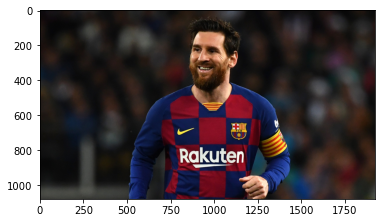

In [19]:
# Let's see the image now
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)
plt.imshow(full)

### Template Image

A subset of the image. Note how its actually the exact image. Later on we'll discuss more advanced methods for general matching, such as facial recognition.

In [4]:
# Now let's read the template that we want to detect in the image 
# We want to detect messi's face 
face= cv2.imread('./DATA/messi_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)

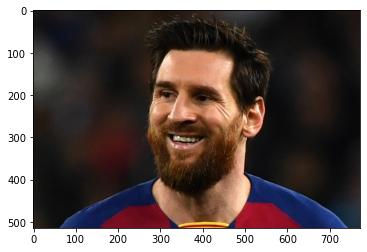

In [5]:
plt.imshow(face)

# Template Matching Methods

In [22]:
height, width,channels = face.shape
print(f'height: {height}, width: {width}')

height: 514, width: 772


In [9]:
# The Full Image to Search
full = cv2.imread('./DATA/messi.jpg')
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)


# The Template to Match
face= cv2.imread('./DATA/messi_face.jpg')
face = cv2.cvtColor(face, cv2.COLOR_BGR2RGB)


# All the 6 methods for comparison in a list
# Note how we are using strings, later on we'll use the eval() function to convert to function
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR','cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

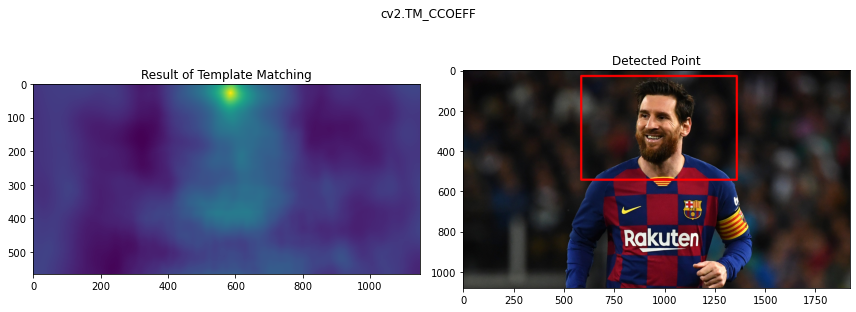

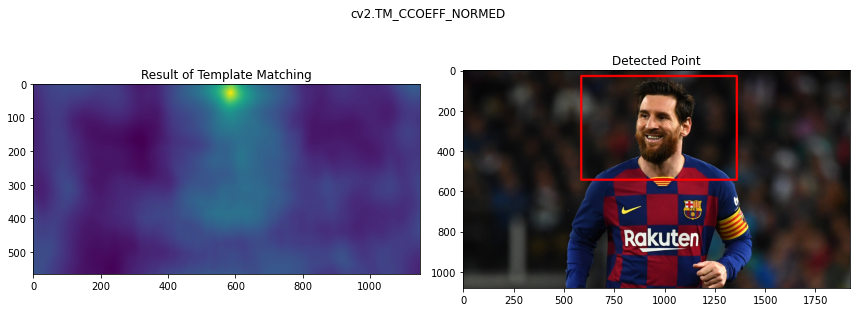

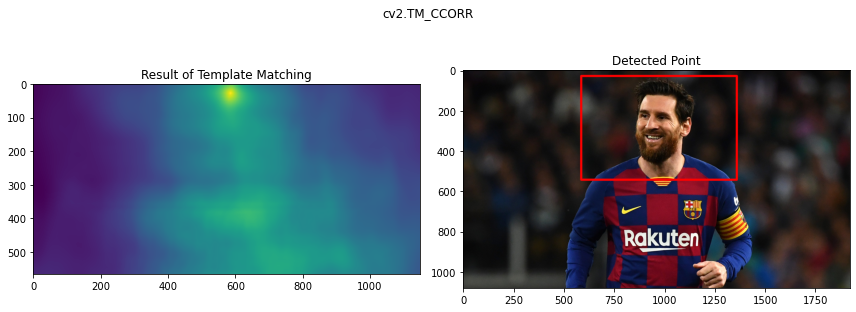

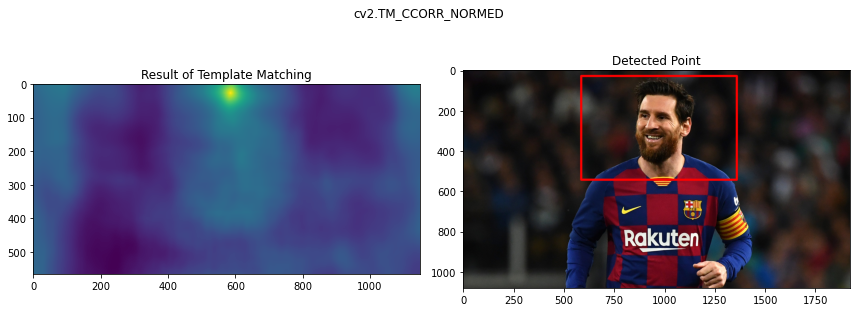

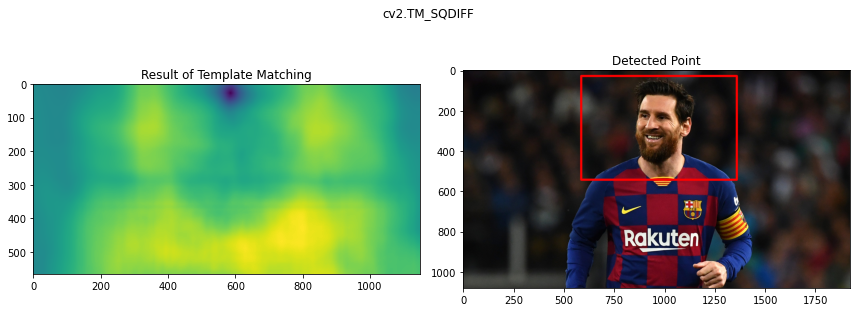

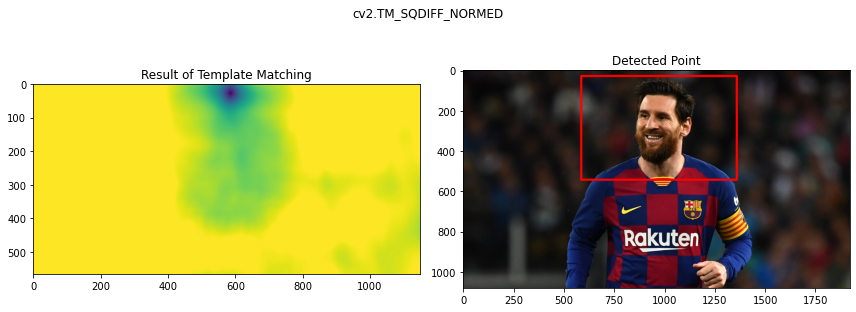

In [15]:
for m in methods:
    
    # Create a copy of the image
    full_copy = full.copy()
    
    # Get the actual function instead of the string
    method = eval(m)

    # Apply template Matching with the method
    res = cv2.matchTemplate(full_copy,face,method)
    
    # Grab the Max and Min values, plus their locations
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    
    # Set up drawing of Rectangle
    
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    # Notice the coloring on the last 2 left hand side images.
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc    
    else:
        top_left = max_loc
        
    # Assign the Bottom Right of the rectangle
    bottom_right = (top_left[0] + width, top_left[1] + height)

    # Draw the Red Rectangle
    cv2.rectangle(full_copy,top_left, bottom_right, 255, 10)

    # Plot the Images
    plt.figure(figsize=(12, 5))
    plt.subplot(121)
    plt.imshow(res)
    plt.title('Result of Template Matching')
    
    plt.subplot(122)
    plt.imshow(full_copy)
    plt.title('Detected Point')
    plt.suptitle(m)
    plt.tight_layout()
    
    plt.show()
    print('\n')
    